In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Estonia'

link = 'https://rally-base.com/2023/rally-estonia-2023/?ssId='
startat, no_ss=7729, int(21) # starting number of url, count of Special Stagesial Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,8,Tänak Ott,RC1,00:03:02.5,66.08 0.00,00:00:00.0 00:00:00.0,1,Estonia,1
2,2,4,Lappi Esa,RC1,00:03:03.1,65.87 0.18,00:00:00.6 00:00:00.6,1,Estonia,2
3,2,33,Evans Elf,RC1,00:03:03.1,65.87 0.18,00:00:00.6 00:00:00.0,1,Estonia,3
4,4,69,Rovanperä,RC1,00:03:03.2,65.83 0.21,00:00:00.7 00:00:00.1,1,Estonia,4
5,5,11,Neuville,RC1,00:03:04.1,65.51 0.48,00:00:01.6 00:00:00.9,1,Estonia,5
...,...,...,...,...,...,...,...,...,...,...
40,40,59,Anwar Ham,RC3,00:11:34.6,95.88 7.55,00:02:19.7 00:00:20.4,21,Estonia,40
41,41,55,Blach Rob,RC3,00:11:38.9,95.29 7.78,00:02:24.0 00:00:04.3,21,Estonia,41
42,42,51,Cumiskey,RC3,00:11:54.9,93.16 8.65,00:02:40.0 00:00:16.0,21,Estonia,42
43,43,45,Cobbe Luc,RC2,00:12:08.0,91.48 9.35,00:02:53.1 00:00:13.1,21,Estonia,43


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.jpg'))


In [8]:
rally2023_ClassView

0                            Pos.                                              \
ss                             1   2   3   4   5   6   7   8   9   10  11  12   
No. Crew       Group Race                                                       
3   Suninen  T RC1   Estonia    7   4   6   5   4   6   7   6   5   6   7   5   
4   Lappi  Esa RC1   Estonia    2   5   5   4   2   3   2   4   4   4   2   2   
7   Loubet  P. RC1   Estonia    8   8   7   7   7   7   3   7   8   7   6   6   
8   Tänak  Ott RC1   Estonia    1   1   1   1   6   2   1   1   6   5   5   4   
11  Neuville   RC1   Estonia    5   2   2   2   4   5   4   5   2   2   4   8   
18  Katsuta  T RC1   Estonia    6   7   8   8   8   8   8   8   7   8   8   7   
20  Solberg  O RC2   Estonia   12   9   9  10  47  46  46  46   9   9   9   9   
21  Greensmith RC2   Estonia   15  12  12  14  13  11   9   9  13  10  22  15   
22  Lindholm   RC2   Estonia   27  15  13  18  17  13  10  21  12  13  12  16   
23  Mikkelsen  RC2   Estonia   11  10  10  16  10   9  11  11  10  12  11  12   
24  Pajari  Sa RC2   Estonia   13  14  16  11   9  17  12  10  11  16  10  10   
25  Kaur  Egon RC2   Estonia   21  11  15  12  11  12  29  18  14  21  21  21   
26  Virves  Ro RC2   Estonia   16  13  14  17  12  16  13  16  15  18  16  18   
27  Bulacia  M RC2   Estonia   20  16  17  15  14  10  21  13  17  15  15  13   
28  Linnamäe   RC2   Estonia   10  17  11   9  15  14  14  15  18  11  14  14   
29  Marczyk  M RC2   Estonia    9  23  18  13  16  15  15  12  19  13  13  10   
30  Zaldivar   RC2   Estonia   19  18  19  19  20  21  22  14  21  17  20  19   
31  McErlean   RC2   Estonia   14  21  20  22  18  18  18  17  16  20  17  17   
33  Evans  Elf RC1   Estonia    2   6   4   6   3   3   6   2   3   3   3   3   
34  Martínez   RC2   Estonia   22  26  24  30  23  23  27  25  25  28  23  24   
35  Bulacia  B RC2   Estonia   16  20  21  21  19  19  26  19  20  23  18  23   
36  Fernàndez  RC2   Estonia   18  19  23  20  21  20  16  20  22  19  19  20   
37  Koik  Prii RC2   Estonia   33  22  22  23  22  22  20  22  23  22  49  22   
38  Kasari  Ka RC2   Estonia   30  28  28  24  27  28  33  26  31  24  26  35   
39  Villanueva RC2   Estonia   37  33  36  38  26  30  36  27  37  33  33  33   
40  Kremer  Ar RC2   Estonia   49  24  27  32  47  46  46  46  35  46  29  36   
41  Miele  Mau RC2   Estonia   32  34  34  35  31  29  35  30  29  41  42  39   
45  Cobbe  Luc RC2   Estonia   44  46  47  49  45  44  44  44  48  48  46  47   
47  Korhonen   RC3   Estonia   29  29  26  25  25  24  23  24  30  26  28  29   
48  Herranen   RC3   Estonia   34  30  29  27  32  31  24  28  33  30  32  31   
49  Türkkan  A RC3   Estonia   35  37  35  36  33  34  32  39  34  32  31  30   
50  Korhola  B RC3   Estonia   22  25  25  26  24  48  49  49  26  29  27  25   
51  Cumiskey   RC3   Estonia   42  41  40  46  42  43  43  43  47  45  44  46   
52  Creighton  RC3   Estonia   25  27  30  29  49  49  48  48  24  25  25  26   
53  Dominguez  RC3   Estonia   24  35  31  34  30  27  25  31  32  34  34  32   
54  Pellier  L RC3   Estonia   26  32  32  31  29  25  19  29  27  31  24  28   
55  Blach  Rob RC3   Estonia   41  39  46  43  36  40  39  42  46  44  43  45   
56  Rensonnet  RC3   Estonia   40  48  43  44  40  38  38  34  41  40  40  42   
57  Kelly  Eam RC3   Estonia   36  49  39  41  35  33  40  33  39  38  37  40   
58  Munster  G RC3   Estonia   28  31  33  28  28  26  17  23  27  27  30  27   
59  Anwar  Ham RC3   Estonia   38  44  44  45  38  45  42  40  43  43  41  44   
60  Mauro  Ale RC2   Estonia   31  43  41  39  39  35  34  37  36  35  35  34   
62  Kohn  Fili RC3   Estonia   39  40  38  40  34  32  30  32  38  39  36  38   
63  Vaher  Jas RC4   Estonia   45  36  37  33  46  36  28  35  42  37  39  43   
64  Sei  Karl- RC4   Estonia   43  38  42  37  37  37  31  36  40  36  38  37   
65  Jürgenson  RC4   Estonia   46  42  45  42  41  39  37  38  44  42  45  41   
66  Lempu  Kev RC4   Estonia   

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,8,Tänak Ott,RC1,1,Estonia,1,182.5
2,4,Lappi Esa,RC1,1,Estonia,2,183.1
3,33,Evans Elf,RC1,1,Estonia,3,183.1
4,69,Rovanperä,RC1,1,Estonia,4,183.2
5,11,Neuville,RC1,1,Estonia,5,184.1
...,...,...,...,...,...,...,...
40,59,Anwar Ham,RC3,21,Estonia,40,694.6
41,55,Blach Rob,RC3,21,Estonia,41,698.9
42,51,Cumiskey,RC3,21,Estonia,42,714.9
43,45,Cobbe Luc,RC2,21,Estonia,43,728.0


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race    ss          
Estonia 1      182.5
        2      796.1
        3      527.4
        4      615.0
        5      798.7
        6      526.1
        7      602.2
        8      272.1
        9      339.3
        10     344.7
        11     334.2
        12     337.6
        13     355.1
        14     478.5
        15     348.7
        16     469.0
        17     180.0
        18     360.0
        19     563.6
        20     355.3
        21     554.9

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,8,Tänak Ott,RC1,1,Estonia,1,182.5,182.5
1,4,Lappi Esa,RC1,1,Estonia,2,183.1,182.5
2,33,Evans Elf,RC1,1,Estonia,3,183.1,182.5
3,69,Rovanperä,RC1,1,Estonia,4,183.2,182.5
4,11,Neuville,RC1,1,Estonia,5,184.1,182.5
...,...,...,...,...,...,...,...,...
1012,59,Anwar Ham,RC3,21,Estonia,40,694.6,554.9
1013,55,Blach Rob,RC3,21,Estonia,41,698.9,554.9
1014,51,Cumiskey,RC3,21,Estonia,42,714.9,554.9
1015,45,Cobbe Luc,RC2,21,Estonia,43,728.0,554.9


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Estonia,1,182.5,182.5,0.0,0.000000,01
1,4,Lappi Esa,RC1,1,Estonia,2,183.1,182.5,0.6,0.328767,01
2,33,Evans Elf,RC1,1,Estonia,3,183.1,182.5,0.6,0.328767,01
3,69,Rovanperä,RC1,1,Estonia,4,183.2,182.5,0.7,0.383562,01
4,11,Neuville,RC1,1,Estonia,5,184.1,182.5,1.6,0.876712,01
...,...,...,...,...,...,...,...,...,...,...,...
1012,59,Anwar Ham,RC3,21,Estonia,40,694.6,554.9,139.7,25.175707,21
1013,55,Blach Rob,RC3,21,Estonia,41,698.9,554.9,144.0,25.950622,21
1014,51,Cumiskey,RC3,21,Estonia,42,714.9,554.9,160.0,28.834024,21
1015,45,Cobbe Luc,RC2,21,Estonia,43,728.0,554.9,173.1,31.194810,21


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC1')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Estonia,1,182.5,182.5,0.0,0.000000,01
1,4,Lappi Esa,RC1,1,Estonia,2,183.1,182.5,0.6,0.328767,01
2,33,Evans Elf,RC1,1,Estonia,3,183.1,182.5,0.6,0.328767,01
3,69,Rovanperä,RC1,1,Estonia,4,183.2,182.5,0.7,0.383562,01
4,11,Neuville,RC1,1,Estonia,5,184.1,182.5,1.6,0.876712,01
...,...,...,...,...,...,...,...,...,...,...,...
976,8,Tänak Ott,RC1,21,Estonia,4,559.5,554.9,4.6,0.828978,21
977,11,Neuville,RC1,21,Estonia,5,561.1,554.9,6.2,1.117318,21
978,7,Loubet P.,RC1,21,Estonia,6,562.8,554.9,7.9,1.423680,21
979,3,Suninen T,RC1,21,Estonia,7,563.3,554.9,8.4,1.513786,21


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Estonia,1,182.5,182.5,0.0,0.000000,01
1,4,Lappi Esa,RC1,1,Estonia,2,183.1,182.5,0.6,0.328767,01
2,33,Evans Elf,RC1,1,Estonia,3,183.1,182.5,0.6,0.328767,01
3,69,Rovanperä,RC1,1,Estonia,4,183.2,182.5,0.7,0.383562,01
4,11,Neuville,RC1,1,Estonia,5,184.1,182.5,1.6,0.876712,01
...,...,...,...,...,...,...,...,...,...,...,...
976,8,Tänak Ott,RC1,21,Estonia,4,559.5,554.9,4.6,0.828978,21
977,11,Neuville,RC1,21,Estonia,5,561.1,554.9,6.2,1.117318,21
978,7,Loubet P.,RC1,21,Estonia,6,562.8,554.9,7.9,1.423680,21
979,3,Suninen T,RC1,21,Estonia,7,563.3,554.9,8.4,1.513786,21


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Estonia                                                         \
SS.             01    02    03   04    05    06   07   08    09   10   11   
Crew                                                                        
Evans  Elf     0.6  11.4   4.3  6.7   2.4   4.0  5.7  1.1   4.0  3.4  2.4   
Katsuta  T     3.2  14.1  14.2  8.2  18.1  14.1  7.1  6.7   9.5  8.7  7.5   
Lappi  Esa     0.6  10.5   7.7  5.5   2.1   4.0  2.0  1.9   4.6  4.0  1.9   
Loubet  P.     5.0  16.8  10.8  7.9  10.0  13.0  3.1  4.3  10.2  8.0  4.0   
Neuville       1.6   5.0   1.8  1.6   4.7   4.4  3.4  2.6   1.6  2.0  2.8   
Rovanperä      0.7   9.1   2.5  4.5   0.0   0.0  3.5  1.8   0.0  0.0  0.0   
Suninen  T     4.5   9.5  10.0  5.6   4.7  11.2  6.5  3.9   6.1  7.8  5.7   
Tänak  Ott     0.0   0.0   0.0  0.0   5.6   3.5  0.0  0.0   7.3  6.9  3.5   

Race                                                                
SS.           12    13    14   15    16   17    18    19   20   21  
Crew                                                                
Evans  Elf   5.0   4.4   7.9  2.4   6.5  2.6   5.0   4.6  2.4  2.1  
Katsuta  T   9.8   9.3  14.8  9.4  13.7  6.2  12.6  11.3  5.0  8.8  
Lappi  Esa   4.3   3.8   6.7  3.4   3.6  0.9   2.7   6.3  1.2  3.9  
Loubet  P.   8.8  10.6  21.1  6.7  15.1  7.2  13.1  14.6  8.8  7.9  
Neuville    10.9   3.6   3.8  3.2   2.7  1.3   5.3   5.0  1.3  6.2  
Rovanperä    0.0   0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0  
Suninen  T   8.6   7.0  13.4  4.6  10.6  3.9  11.1  14.8  5.3  8.4  
Tänak  Ott   7.0   7.2  17.3  4.0   8.6  6.4   9.3   9.1  7.4  4.6

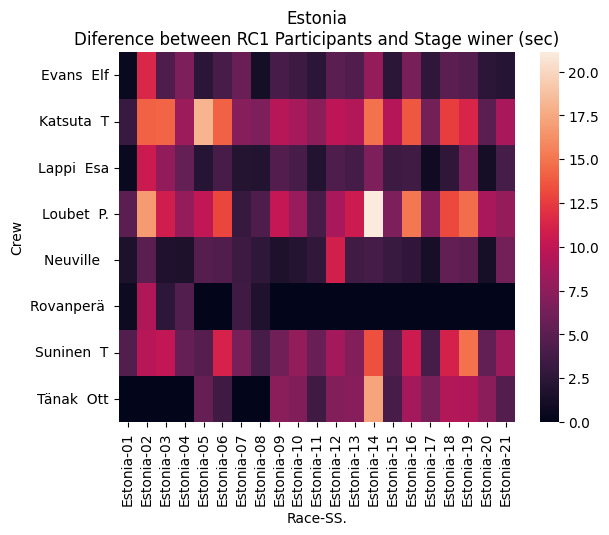

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

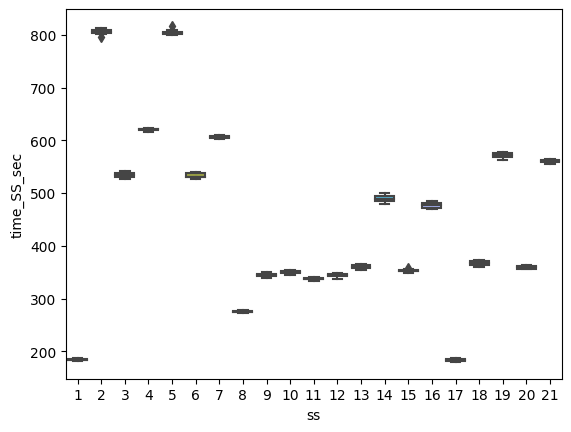

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

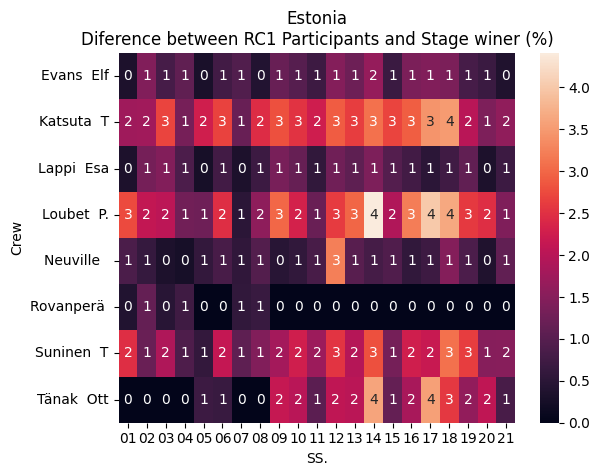

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")